In [7]:
import  glob 
import  numpy  as  np 
import  os 
import  shutil

np.random.seed (42)

In [8]:
#Cargando datos 

files = glob.glob('train/*')

cat_files = [fn for fn in files if 'cat' in fn]
dog_files = [fn for fn in files if 'dog' in fn]
len(cat_files), len(dog_files)

(12500, 12500)

In [9]:
#Separando datos y preparando nuestro dataset

cat_train = np.random.choice(cat_files, size=1500, replace=False)
dog_train = np.random.choice(dog_files, size=1500, replace=False)
cat_files = list(set(cat_files) - set(cat_train))
dog_files = list(set(dog_files) - set(dog_train))

cat_val = np.random.choice(cat_files, size=500, replace=False)
dog_val = np.random.choice(dog_files, size=500, replace=False)
cat_files = list(set(cat_files) - set(cat_val))
dog_files = list(set(dog_files) - set(dog_val))

cat_test = np.random.choice(cat_files, size=500, replace=False)
dog_test = np.random.choice(dog_files, size=500, replace=False)

print('Cat datasets:', cat_train.shape, cat_val.shape, cat_test.shape)
print('Dog datasets:', dog_train.shape, dog_val.shape, dog_test.shape)

Cat datasets: (1500,) (500,) (500,)
Dog datasets: (1500,) (500,) (500,)


In [6]:
#Escribiendo datos 

train_dir = 'training_data'
val_dir = 'validation_data'
test_dir = 'test_data'

train_files = np.concatenate([cat_train, dog_train])
validate_files = np.concatenate([cat_val, dog_val])
test_files = np.concatenate([cat_test, dog_test])

os.mkdir(train_dir) if not os.path.isdir(train_dir) else None
os.mkdir(val_dir) if not os.path.isdir(val_dir) else None
os.mkdir(test_dir) if not os.path.isdir(test_dir) else None

for fn in train_files:
    shutil.copy(fn, train_dir)

for fn in validate_files:
    shutil.copy(fn, val_dir)
    
for fn in test_files:
    shutil.copy(fn, test_dir)

In [10]:
#importando librerias

import tensorflow as tf
import  glob 
import  numpy  as  np 
import  matplotlib.pyplot  as  plt 
from  keras.preprocessing.image  import  ImageDataGenerator, load_img, img_to_array, array_to_img
%matplotlib en línea

UsageError: unrecognized arguments: línea


In [11]:
#Cargando datos

IMG_DIM = (150, 150)

train_files = glob.glob('training_data/*')
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)
train_labels = [fn.split('\\')[1].split('.')[0].strip() for fn in train_files]

validation_files = glob.glob('validation_data/*')
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)
validation_labels = [fn.split('\\')[1].split('.')[0].strip() for fn in validation_files]

print('Train dataset shape:', train_imgs.shape, 
      '\tValidation dataset shape:', validation_imgs.shape)

Train dataset shape: (3000, 150, 150, 3) 	Validation dataset shape: (1000, 150, 150, 3)


(150, 150, 3)


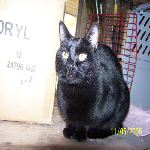

In [12]:
#Escalando imagenes

train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled  = validation_imgs.astype('float32')
train_imgs_scaled /= 255
validation_imgs_scaled /= 255

print(train_imgs[0].shape)
array_to_img(train_imgs[0])

In [13]:
#Configurando hiperparametros

batch_size = 30
num_classes = 2
epochs = 30
input_shape = (150, 150, 3)

# encode text category labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)
train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)

print(train_labels[1495:1505], train_labels_enc[1495:1505])

['cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'dog'] [0 0 0 0 0 1 1 1 1 1]


In [14]:
#Modelo CNN desde cero

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers

model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36992)            

In [15]:
#Entrenamiento del modelo

history = model.fit(x=train_imgs_scaled, y=train_labels_enc,
                    validation_data=(validation_imgs_scaled, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)


Train on 3000 samples, validate on 1000 samples
Epoch 1/30
3000/3000 [==============================] - 11s 4ms/step - loss: 1.1301 - accuracy: 0.5423 - val_loss: 0.6734 - val_accuracy: 0.5570
Epoch 2/30
3000/3000 [==============================] - 8s 3ms/step - loss: 0.6490 - accuracy: 0.6313 - val_loss: 0.6050 - val_accuracy: 0.6770
Epoch 3/30
3000/3000 [==============================] - 8s 3ms/step - loss: 0.5649 - accuracy: 0.7017 - val_loss: 0.6739 - val_accuracy: 0.6580
Epoch 4/30
3000/3000 [==============================] - 8s 3ms/step - loss: 0.4853 - accuracy: 0.7723 - val_loss: 0.5475 - val_accuracy: 0.7220
Epoch 5/30
3000/3000 [==============================] - 8s 3ms/step - loss: 0.4031 - accuracy: 0.8123 - val_loss: 0.5779 - val_accuracy: 0.7370
Epoch 6/30
3000/3000 [==============================] - 8s 3ms/step - loss: 0.3154 - accuracy: 0.8653 - val_loss: 0.6323 - val_accuracy: 0.7330
Epoch 7/30
3000/3000 [==============================] - 8s 3ms/step - loss: 0.2346 - ac

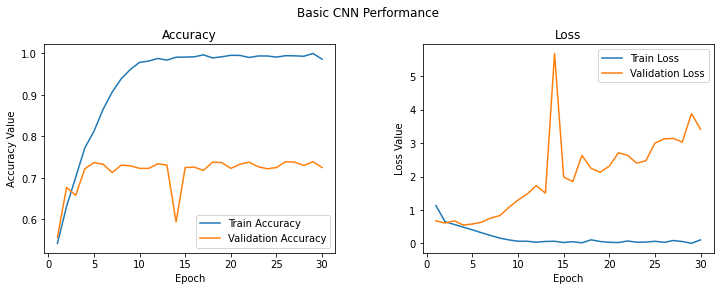

In [16]:
#Graficando resultados

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [14]:
#Modelo CNN con regularización

model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])
              
              
history = model.fit(x=train_imgs_scaled, y=train_labels_enc,
                    validation_data=(validation_imgs_scaled, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)    

Train on 3000 samples, validate on 1000 samples
Epoch 1/30
3000/3000 [==============================] - 7s 2ms/step - loss: 0.6927 - accuracy: 0.5453 - val_loss: 0.6677 - val_accuracy: 0.6380
Epoch 2/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.6531 - accuracy: 0.6127 - val_loss: 0.6285 - val_accuracy: 0.6600
Epoch 3/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.6111 - accuracy: 0.6543 - val_loss: 0.5915 - val_accuracy: 0.7000
Epoch 4/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.5748 - accuracy: 0.7023 - val_loss: 0.5730 - val_accuracy: 0.7280
Epoch 5/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.5372 - accuracy: 0.7263 - val_loss: 0.5410 - val_accuracy: 0.7290
Epoch 6/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.5001 - accuracy: 0.7553 - val_loss: 0.5027 - val_accuracy: 0.7580
Epoch 7/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.4576 - acc

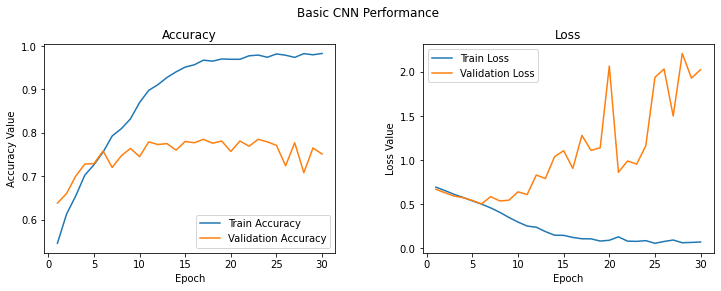

In [15]:
#Graficando Resultados

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [16]:
model.save ('cats_dogs_basic_cnn.h5')

In [17]:
#Modelo CNN con aumento de imagen

train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

Labels: ['cat', 'cat', 'cat', 'cat', 'cat']


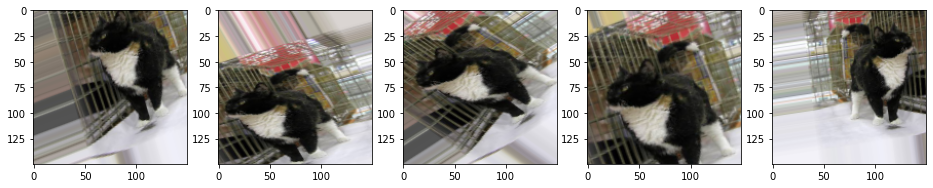

In [20]:
img_id = 3
cat_generator = train_datagen.flow(train_imgs[img_id:img_id+1], train_labels[img_id:img_id+1],
                                   batch_size=1)
cat = [next(cat_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(16, 6))
print('Labels:', [item[1][0] for item in cat])
l = [ax[i].imshow(cat[i][0][0]) for i in range(0,5)]

Labels: ['dog', 'dog', 'dog', 'dog', 'dog']


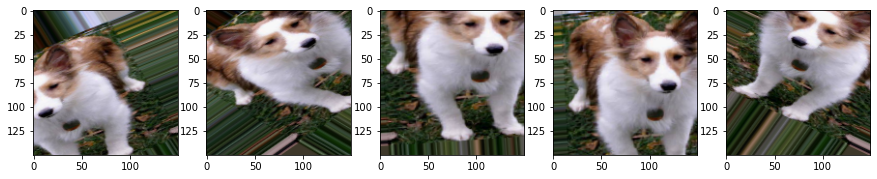

In [21]:
img_id = 1991
dog_generator = train_datagen.flow(train_imgs[img_id:img_id+1], train_labels[img_id:img_id+1],
                                   batch_size=1)
dog = [next(dog_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(15, 6))
print('Labels:', [item[1][0] for item in dog])
l = [ax[i].imshow(dog[i][0][0]) for i in range(0,5)]

In [37]:
#Entrenamient de modelo CNN con regularización utilizando los generadores de datos de aumento de imagen

train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)
input_shape = (150, 150, 3)

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers

model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])
              
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100,
                              validation_data=val_generator, validation_steps=50, 
                              verbose=1) 

Epoch 1/100
100/100 [==============================] - 17s 173ms/step - loss: 0.6948 - accuracy: 0.5083 - val_loss: 0.6974 - val_accuracy: 0.5000
Epoch 2/100
100/100 [==============================] - 16s 161ms/step - loss: 0.6859 - accuracy: 0.5403 - val_loss: 0.6425 - val_accuracy: 0.5120
Epoch 3/100
100/100 [==============================] - 15s 154ms/step - loss: 0.6745 - accuracy: 0.5830 - val_loss: 0.6616 - val_accuracy: 0.5450
Epoch 4/100
100/100 [==============================] - 15s 153ms/step - loss: 0.6627 - accuracy: 0.5960 - val_loss: 0.6305 - val_accuracy: 0.5790
Epoch 5/100
100/100 [==============================] - 15s 153ms/step - loss: 0.6493 - accuracy: 0.6177 - val_loss: 0.7471 - val_accuracy: 0.6240
Epoch 6/100
100/100 [==============================] - 16s 157ms/step - loss: 0.6502 - accuracy: 0.6173 - val_loss: 0.6408 - val_accuracy: 0.5920
Epoch 7/100
100/100 [==============================] - 15s 154ms/step - loss: 0.6463 - accuracy: 0.6240 - val_loss: 0.7357 -

Epoch 57/100
100/100 [==============================] - 16s 161ms/step - loss: 0.4572 - accuracy: 0.7823 - val_loss: 0.3391 - val_accuracy: 0.7930
Epoch 58/100
100/100 [==============================] - 16s 163ms/step - loss: 0.4406 - accuracy: 0.7950 - val_loss: 0.2744 - val_accuracy: 0.7840
Epoch 59/100
100/100 [==============================] - 16s 161ms/step - loss: 0.4412 - accuracy: 0.7927 - val_loss: 0.4193 - val_accuracy: 0.8140
Epoch 60/100
100/100 [==============================] - 16s 163ms/step - loss: 0.4511 - accuracy: 0.7900 - val_loss: 0.3739 - val_accuracy: 0.8210
Epoch 61/100
100/100 [==============================] - 16s 156ms/step - loss: 0.4470 - accuracy: 0.7907 - val_loss: 0.6753 - val_accuracy: 0.8100
Epoch 62/100
100/100 [==============================] - 15s 152ms/step - loss: 0.4375 - accuracy: 0.7977 - val_loss: 0.3891 - val_accuracy: 0.8050
Epoch 63/100
100/100 [==============================] - 15s 151ms/step - loss: 0.4159 - accuracy: 0.8067 - val_loss: 0

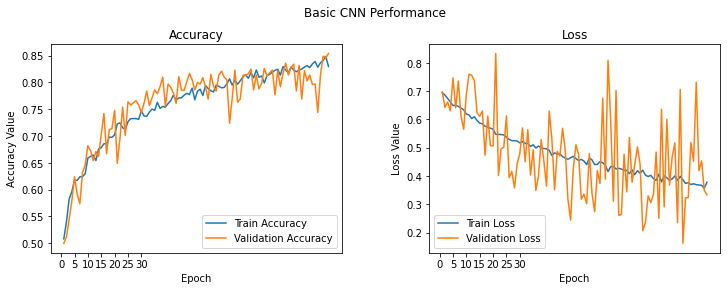

In [38]:
#Graficando resultados

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,101))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [24]:
model.save ('cats_dogs_cnn_img_aug.h5')

In [26]:
#Carga de modelo VGG-16 y congelamiento de bloques de convolución
from keras.applications import vgg16
from keras.models import Model
import keras

vgg = vgg16.VGG16(include_top=False, weights='imagenet', 
                                     input_shape=input_shape)

output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)

vgg_model.trainable = False
for layer in vgg_model.layers:
    layer.trainable = False
    
import pandas as pd
pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable']) 

C:\Users\Roberto GB\anaconda3\envs\ML\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x000002CD2D68A908>,input_2,False
1,<keras.layers.convolutional.Conv2D object at 0x000002CD2D68AA88>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x000002CD2D68AF88>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x000002CD2D68CBC8>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x000002CD2D6A4F08>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x000002CD2D69B0C8>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x000002CD2D6ABE08>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x000002CD2D6AB9C8>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x000002CD2D699388>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x000002CD2D68EC88>,block3_conv3,False


(1, 4, 4, 512)


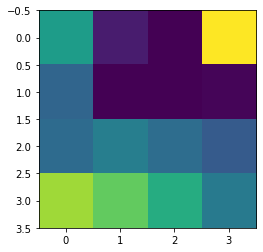

In [27]:
# características del cuello de botella para una imagen de muestra de los datos de entrenamiento.

bottleneck_feature_example = vgg.predict (train_imgs_scaled [0: 1]) 
print (bottleneck_feature_example.shape) 
plt.imshow (bottleneck_feature_example [0] [:,:, 0])

In [28]:
# extraer las características de cuello de botella de nuestros conjuntos de capacitación y validación.

def get_bottleneck_features(model, input_imgs):
    features = model.predict(input_imgs, verbose=0)
    return features
    
train_features_vgg = get_bottleneck_features(vgg_model, train_imgs_scaled)
validation_features_vgg = get_bottleneck_features(vgg_model, validation_imgs_scaled)

print('Train Bottleneck Features:', train_features_vgg.shape, 
      '\tValidation Bottleneck Features:', validation_features_vgg.shape)

Train Bottleneck Features: (3000, 8192) 	Validation Bottleneck Features: (1000, 8192)


In [29]:
#Construcción de la arquitectura del clasificador de redes neuronales.

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

input_shape = vgg_model.output_shape[1]

model = Sequential()
model.add(InputLayer(input_shape=(input_shape,)))
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 513       
Total params: 4,457,985
Trainable params: 4,457,985
Non-trainable params: 0
_________________________________________________________________


In [30]:
#Entrenamiento del modelo

history = model.fit(x=train_features_vgg, y=train_labels_enc,
                    validation_data=(validation_features_vgg, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Train on 3000 samples, validate on 1000 samples
Epoch 1/30
3000/3000 [==============================] - 1s 405us/step - loss: 0.4333 - accuracy: 0.7943 - val_loss: 0.2962 - val_accuracy: 0.8660
Epoch 2/30
3000/3000 [==============================] - 1s 351us/step - loss: 0.2822 - accuracy: 0.8790 - val_loss: 0.2581 - val_accuracy: 0.8870
Epoch 3/30
3000/3000 [==============================] - 1s 362us/step - loss: 0.2337 - accuracy: 0.8957 - val_loss: 0.2452 - val_accuracy: 0.8940
Epoch 4/30
3000/3000 [==============================] - 1s 358us/step - loss: 0.2096 - accuracy: 0.9187 - val_loss: 0.2469 - val_accuracy: 0.8920
Epoch 5/30
3000/3000 [==============================] - 1s 359us/step - loss: 0.1736 - accuracy: 0.9317 - val_loss: 0.2619 - val_accuracy: 0.8910
Epoch 6/30
3000/3000 [==============================] - 1s 359us/step - loss: 0.1388 - accuracy: 0.9483 - val_loss: 0.2727 - val_accuracy: 0.8920
Epoch 7/30
3000/3000 [==============================] - 1s 357us/step - loss

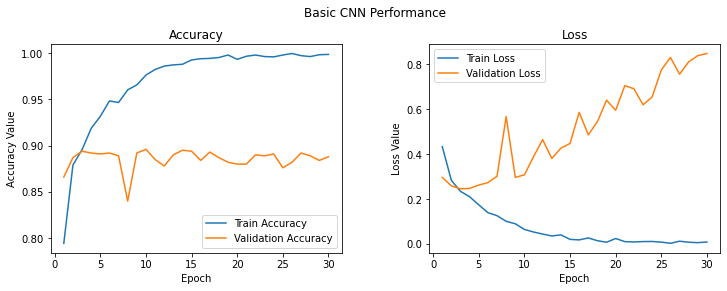

In [31]:
#Graficando resultados

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [32]:
model.save ('cats_dogs_tlearn_basic_cnn.h5')

In [33]:
#Modelo CNN pre-entrenado como un extractor de características con aumento de imagen

train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)

In [34]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

model = Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])
              
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100,
                              validation_data=val_generator, validation_steps=50, 
                              verbose=1) 

Epoch 1/100
100/100 [==============================] - 29s 294ms/step - loss: 0.6448 - accuracy: 0.6273 - val_loss: 0.4721 - val_accuracy: 0.8150
Epoch 2/100
100/100 [==============================] - 26s 259ms/step - loss: 0.5578 - accuracy: 0.7143 - val_loss: 0.4169 - val_accuracy: 0.8410
Epoch 3/100
100/100 [==============================] - 26s 262ms/step - loss: 0.5146 - accuracy: 0.7463 - val_loss: 0.4384 - val_accuracy: 0.8570
Epoch 4/100
100/100 [==============================] - 26s 264ms/step - loss: 0.4789 - accuracy: 0.7717 - val_loss: 0.3484 - val_accuracy: 0.8720
Epoch 5/100
100/100 [==============================] - 27s 267ms/step - loss: 0.4629 - accuracy: 0.7827 - val_loss: 0.3692 - val_accuracy: 0.8790
Epoch 6/100
100/100 [==============================] - 28s 284ms/step - loss: 0.4350 - accuracy: 0.7923 - val_loss: 0.4113 - val_accuracy: 0.8760
Epoch 7/100
100/100 [==============================] - 33s 329ms/step - loss: 0.4294 - accuracy: 0.8023 - val_loss: 0.3547 -

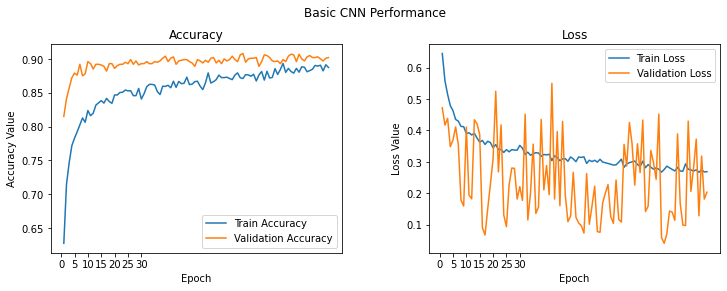

In [35]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,101))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")